[Reference](https://towardsdatascience.com/how-to-apply-hierarchical-clustering-to-time-series-a5fe2a7d8447)

In [2]:
!pip install sktime

     |████████████████████████████████| 5.7MB 875kB/s 
     |████████████████████████████████| 9.5MB 22.5MB/s 
     |████████████████████████████████| 22.3MB 47.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from sktime.datasets.base import load_italy_power_demand
data = load_italy_power_demand()

In [4]:
import pandas as pd

# Reshape the data so each series is a column and call the dataframe.corr() function 
distance_matrix = pd.concat([series for series in data['dim_0'].values], axis=1).corr()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from sktime.distances.elastic_cython import dtw_distance

# Italy Power Demand time series are loaded in a pd.Series format.
# The dtw_distance function expects series to be shaped as a (l, m) array, 
# where l=length of series, m=# dimensions           
series_list = data['dim_0'].values
for i in range(len(series_list)):
    length = len(series_list[i])
    series_list[i] = series_list[i].reshape((length, 1))

# Initialize distance matrix
n_series = len(series_list)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list[i]
        y = series_list[j]
        if i != j:
            dist = dtw_distance(x, y)
            distance_matrix[i, j] = dist

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


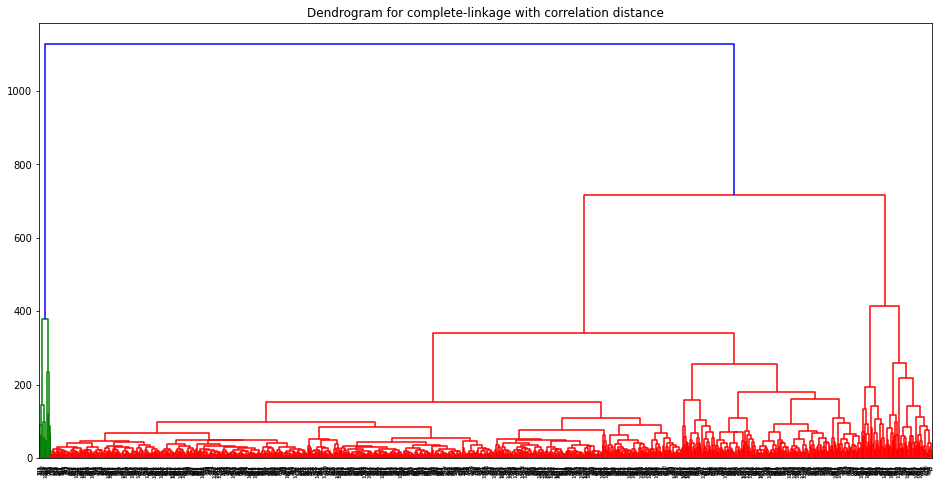

In [10]:
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram

def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

linkage_matrix = hierarchical_clustering(distance_matrix)

In [11]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 4 unique clusters
cluster_labels = fcluster(linkage_matrix, 10, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 10 unique clusters

# hand-select an appropriate cut-off on the dendrogram
cluster_labels = fcluster(linkage_matrix, 600, criterion='distance')
print(np.unique(cluster_labels))
#>> 3 unique clusters
cluster_labels = fcluster(linkage_matrix, 800, criterion='distance')
print(np.unique(cluster_labels))
#>> 2 unique clusters

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3]
[1 2]
